In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import fitsio
from astropy.io import fits
import pandas as pd 
import sys
from quickbin import bin2d
from pyarrow import parquet
sys.path.append('/home/bekah/gPhoton2')
from gPhoton.io.mast import get_raw_paths 

#urls = get_raw_paths(eclipse, verbose=verbose)


In [41]:
urls = get_raw_paths(37466, verbose=False)


In [42]:
urls

{'NUV': 'http://galex.stsci.edu/gPhoton/RAW6/e37400_37499/37466/e37466-nd-raw6.fits.gz',
 'FUV': 'http://galex.stsci.edu/gPhoton/RAW6/e37400_37499/37466/e37466-fd-raw6.fits.gz',
 'scst': 'http://galex.stsci.edu/gPhoton/RAW6/e37400_37499/37466/e37466-scst.fits.gz'}

In [ ]:
hdul_382 = fits.open("e38268-scst.fits")
hdul_381 = fits.open("e38150-scst.fits")


In [ ]:
hdul_382[0].header

In [ ]:
hdul_381[0].header

In [43]:
hdul_374 = fits.open("e37466-scst.fits") 

In [44]:
hdul_374[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT = '        '           /   FITS (Flexible Image Transport System) format
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
GRELEASE= 'ops-v7_2_1'                                                          
TRANGE0 = '100507T043956Z'                                                      
TRANGE1 = '100507T061830Z'                                                      
RA_CENT =                199.6                                                  
DEC_CENT=                  8.7                                                  
MPSTYPE = 'GII     '                                                            
MPSPLAN = 'gip     '        

In [2]:
aspect  = parquet.read_table('/home/bekah/gPhoton2/gPhoton/aspect/aspect.parquet',
                           filters=[('eclipse','=',38104)]).to_pandas()

In [11]:
small = aspect[aspect['eclipse']<38160]

In [12]:
uni = small['eclipse'].unique()

In [3]:
aspect

,eclipse,time,ra,dec,roll,flags
0,38104,9.610165e+08,244.613125,55.174097,189.004430,81
1,38104,9.610165e+08,244.613535,55.174314,189.018521,64
2,38104,9.610165e+08,244.613938,55.174391,189.018827,64
3,38104,9.610165e+08,244.614385,55.174540,189.019239,64
4,38104,9.610165e+08,244.614673,55.174771,189.019498,64
...,...,...,...,...,...,...
1062,38104,9.610175e+08,244.588634,55.173207,189.001828,64
1063,38104,9.610175e+08,244.589342,55.172769,189.002459,64
1064,38104,9.610175e+08,244.590223,55.172461,189.003240,64
1065,38104,9.610175e+08,244.591163,55.172219,189.004021,64


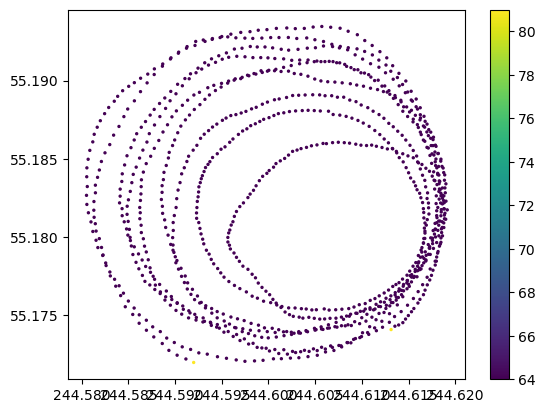

In [7]:
plt.scatter(aspect['ra'],aspect['dec'],c=aspect['flags'],s=2)
plt.colorbar()

(array([37., 39.,  9.,  0.,  0.,  0.,  0.,  0., 13., 25.]),
 array([37466. , 37535.3, 37604.6, 37673.9, 37743.2, 37812.5, 37881.8,
        37951.1, 38020.4, 38089.7, 38159. ]),
 <BarContainer object of 10 artists>)

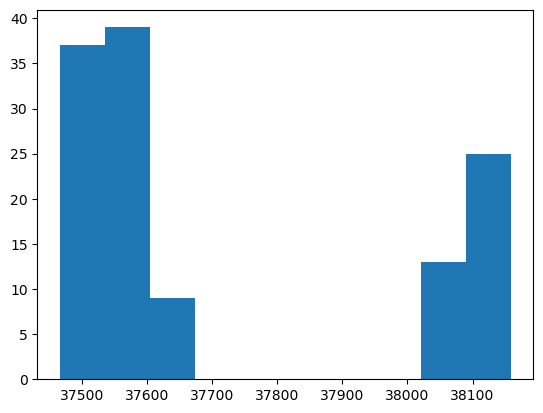

In [14]:
plt.hist(uni)

In [ ]:
so basically, eclipses 37423 through 37465 do not exist. data starts again at 37466. 37422 was on May 4th, probably right before CSP. 37466 was on 100507T043956Z (May 7th). 